In [13]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

# 1. Importing  Data

#  2. Data Exploratory Analysis

# Creating X and Y for the dataset

In [14]:
X_select = pd.read_csv('NY/X_select.csv',index_col=0)
Y = pd.read_csv('NY/Y.csv',index_col=0)

In [158]:
X_select

,accommodates,bathrooms,bedrooms,beds,guests_included,latitude,longitude,price,avail,1,...,178,179,180,181,182,183,184,185,186,review_scores_rating
0,2,1.0,0.0,1.0,1,40.774142,-73.916246,110,0,0,...,0,0,0.0,0.0,0,1,0,0,250,0.0
1,2,1.0,1.0,1.0,1,40.849191,-73.786509,50,169,0,...,0,0,0.0,0.0,1,0,1,0,500,100.0
2,3,1.0,1.0,1.0,1,40.849775,-73.786609,125,363,0,...,0,0,0.0,0.0,2,1,0,0,0,95.0
3,4,1.0,1.0,3.0,1,40.848838,-73.782276,100,90,0,...,0,0,0.0,0.0,3,1,0,0,0,0.0
4,4,3.0,3.0,3.0,4,40.841144,-73.783052,300,365,0,...,0,0,0.0,0.0,4,1,0,0,800,0.0
5,4,1.0,1.0,1.0,2,40.850024,-73.789328,69,325,0,...,0,0,0.0,0.0,5,0,1,0,0,97.0
6,7,1.0,2.0,5.0,2,40.851980,-73.789304,150,74,0,...,0,0,0.0,0.0,6,1,0,0,1000,100.0
7,2,1.0,1.0,1.0,1,40.852054,-73.788680,101,179,0,...,0,0,1.0,1.0,7,0,1,0,100,100.0
8,4,1.5,2.0,2.0,1,40.842124,-73.785197,100,364,0,...,0,0,0.0,0.0,8,1,0,0,500,0.0
9,4,1.0,1.0,1.0,1,40.853491,-73.788607,200,180,0,...,0,0,0.0,0.0,9,0,1,0,0,0.0


# Data visulization

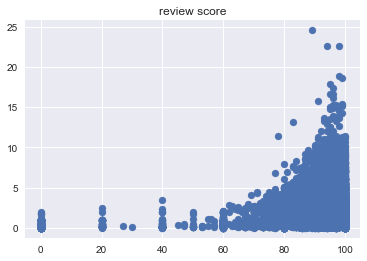

In [15]:
plt.scatter(X_select.review_scores_rating,Y)
plt.title("review score")

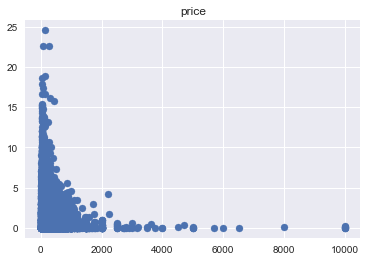

In [16]:
plt.scatter(X_select.price,Y)
plt.title("price")

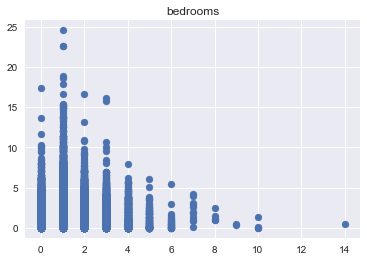

In [17]:
plt.scatter(X_select.bedrooms,Y)
plt.title("bedrooms")

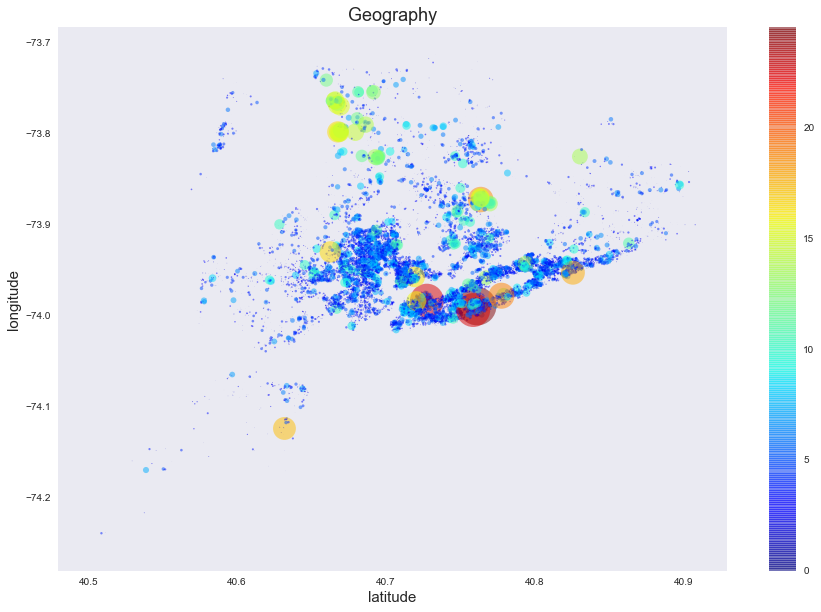

In [18]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('jet')
sc = ax.scatter(X_select['latitude'],X_select['longitude'], s=Y**3/10,c=Y,cmap=cm,linewidth=0,alpha=0.5)
ax.grid()
fig.colorbar(sc)
plt.xlabel('latitude',fontsize=15)
plt.ylabel('longitude',fontsize=15)
plt.title("Geography",fontsize=18)
plt.show()

# Splitting data into training and testing sets

In [19]:
num_test = 0.1
X_train, X_test, y_train, y_test = train_test_split(X_select, Y, test_size=num_test, random_state=23)

# Learning Curve

In [20]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# Ridge Regression without Validation Curve

In [147]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
clf = Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.41 (+/- 0.02)


In [148]:
clf = Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)
clf.fit(X_train, y_train) 

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.413408903958
0.423074358068


In [149]:
from sklearn.metrics import mean_squared_error
mean_squared_error(clf.predict(X_train),y_train)**0.5

1.1979742308606458

In [150]:
mean_squared_error(clf.predict(X_test),y_test)**0.5

1.2034122714313684

In [151]:
clf.coef_

array([[  3.91069198e-02,  -4.77078137e-02,  -7.15734456e-02,
          2.47124745e-02,   4.23931050e-02,   4.36515956e-01,
          6.98514360e-02,  -8.43455040e-05,   6.30003287e-04,
          4.20275437e-02,  -5.07562333e-02,   1.01783956e-01,
          1.07830058e-01,  -4.16409919e-01,  -2.86672252e-01,
          1.92911721e-01,   1.19329090e-01,   1.28276894e-01,
          7.24136164e-03,   3.18276509e-01,  -1.57464445e-01,
         -1.20380490e-01,   4.09818201e-02,   4.69618987e-02,
         -2.77466944e-02,  -6.92860169e-04,   7.45626820e-02,
         -3.67766090e-02,  -1.85555076e-01,  -1.08949866e-01,
         -1.31527516e-01,  -1.74113392e-01,  -6.60995306e-03,
         -7.34301206e-02,  -1.16688834e-01,  -3.36547859e-01,
          7.74998414e-02,  -4.27460053e-02,   2.93594430e-02,
         -3.27191642e-02,  -3.52375850e-02,   6.98649451e-02,
         -4.53422800e-02,   6.81010490e-02,   4.89258572e-02,
         -2.46394721e-02,   8.30068421e-02,   3.82745237e-02,
        

# Linear Regression

In [119]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
clf_lr = linear_model.LinearRegression()
scores_lr = cross_val_score(clf_lr, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_lr.mean(), scores_lr.std() * 2))

Accuracy: -81.90 (+/- 239.68)


In [120]:
clf_lr = linear_model.LinearRegression()
clf_lr.fit(X_train, y_train) 
print(clf_lr.score(X_train, y_train))
print(clf_lr.score(X_test, y_test))

0.418026075284
0.427920157491


In [121]:
from sklearn.metrics import mean_squared_error
mean_squared_error(clf_lr.predict(X_train),y_train)**0.5

1.1932501737267944

In [122]:
mean_squared_error(clf_lr.predict(X_test),y_test)**0.5

1.1983476747567323

In [155]:
clf_lr.coef_

array([[  6.59971540e-02,  -4.39908906e-02,  -1.07654232e-01,
          1.97275700e-02,   4.70481241e-02,   4.97310640e-01,
         -2.45047012e-01,  -7.55569380e-05,   6.73711852e-04,
          3.68062904e-02,  -1.01851532e-01,   1.32883257e-01,
          1.12602185e-01,  -4.87617147e-01,  -3.15191127e-01,
          2.76798941e-01,   1.60887016e-01,   1.67542544e-01,
         -1.41479568e-02,   3.58299549e-01,  -1.44652441e-01,
         -1.00479757e-01,  -8.81491105e-03,   4.63059101e-02,
         -2.62910135e-02,  -2.37538105e-03,   8.46255907e-02,
         -2.71398812e-02,  -2.01580896e-01,  -1.14434895e-01,
         -1.83724445e-01,  -1.92018793e-01,  -8.53544961e-02,
         -2.84641775e-01,  -1.22323246e-01,  -3.48449281e-01,
          1.97187385e-01,  -3.98360966e-02,   4.76698723e-02,
         -1.27450347e-02,  -2.12663665e-03,   6.90627142e-02,
         -4.62407841e-02,   7.10807379e-02,   5.99368203e-02,
         -4.84243687e-02,   8.97099771e-02,   3.88016345e-02,
        

# Lasso

In [124]:
# Selecting hyperparameter 'alpha' through cross validation
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
clf_lasso = Lasso(alpha=0.005, fit_intercept=True, normalize=False, precompute=False, copy_X=True, 
               max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
scores_lasso = cross_val_score(clf_lasso, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_lasso.mean(), scores_lasso.std() * 2))

Accuracy: 0.41 (+/- 0.02)


In [126]:
clf_lasso = Lasso(alpha=0.005, fit_intercept=True, normalize=False, precompute=False, copy_X=True, 
               max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
clf_lasso.fit(X_train, y_train) # Final model fitting
print(clf_lasso.score(X_train,y_train))
print(clf_lasso.score(X_test, y_test))

0.407154138004
0.419201367469


In [128]:
from sklearn.metrics import mean_squared_error
mean_squared_error(clf_lasso.predict(X_train),y_train)**0.5

1.2043442387362868

In [129]:
mean_squared_error(clf_lasso.predict(X_test),y_test)**0.5

1.2074448607708563

In [157]:
clf_lasso.coef_

array([  6.55793999e-02,  -1.37812130e-02,  -8.64703193e-02,
         7.23039378e-03,   4.55016573e-02,   0.00000000e+00,
         0.00000000e+00,  -1.34893435e-04,   7.24783702e-04,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         7.40551730e-02,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -8.48203682e-03,  -0.00000000e+00,   6.71590318e-02,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -1.19409265e-02,  -6.34224266e-03,   0.00000000e+00,
        -4.31372017e-02,   4.84431225e-02,   0.00000000e+00,
         0.00000000e+00,   5.38722567e-02,   1.65089267e-02,
        -0.00000000e+00,

# Huber Regression

In [160]:
# Selecting hyperparameter 'alpha' through cross validation
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
clf_huber = HuberRegressor(epsilon=1.1, max_iter=100, alpha=0.001, warm_start=False, fit_intercept=True, tol=1e-05)
scores_huber = cross_val_score(clf_huber, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_huber.mean(), scores_huber.std() * 2))

G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

KeyboardInterrupt: 

# Elastic Net

In [18]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
# print(regr.coef_) 
# print(regr.intercept_) 
# print(regr.predict([[0, 0]])) 
regr.score(X_test, y_test)

0.18241041149293125

# SVR

In [ ]:
from sklearn import svm
clf_svm=svm.SVR(kernel='linear')
clf_svm.fit(X_train,y_train)
clf_svm.score(X_test,y_test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
#            oob_score=False, random_state=0, verbose=0, warm_start=False)
clf = RandomForestRegressor(max_depth=30, n_estimators=300, random_state=0)
clf.fit(X_train, y_train)
# print(clf.feature_importances_)
RFTrain = clf.predict(X_train)
RFTest = clf.predict(X_test)
clf.score(X_test, y_test)

# XGboost

In [21]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_train = pd.DataFrame(X_train)
# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBRegressor(max_depth=5, n_estimators=400, learning_rate=0.05).fit(X_train, y_train)
X_test = preprocessing.scale(X_test)
X_test = pd.DataFrame(X_test)
predictions = gbm.predict(X_test)
XGTrain = gbm.predict(X_train)
XGTest = gbm.predict(X_test)
gbm.score(X_test, y_test)


NameError: name 'r2_score' is not defined

In [22]:
gbm.score(X_test, y_test)


0.57769759587608216

# Deep Net

In [19]:
from __future__ import print_function
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout

# create model
tmodel = Sequential()
tmodel.add(Dense(input_dim=X_train.shape[1], units=128,
                 kernel_initializer='normal', bias_initializer='zeros'))
tmodel.add(Activation('relu'))

for i in range(0, 8):
    tmodel.add(Dense(units=100, kernel_initializer='normal',
                     bias_initializer='zeros'))
    tmodel.add(Activation('relu'))
    tmodel.add(Dropout(.25))

tmodel.add(Dense(units=1))
tmodel.add(Activation('linear'))

tmodel.compile(loss='mean_squared_error', optimizer='rmsprop')

tmodel.fit(X_train.values, y_train.values, epochs=100, verbose=0)

DNTrain = tmodel.predict(X_train.values)
DNTest = tmodel.predict(X_test.values)

ImportError: No module named keras.models

In [ ]:
classes = tmodel.predict(X_test.values)
loss_and_metrics = tmodel.evaluate(X_test.values, y_test.values, batch_size=128)
print(loss_and_metrics)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test.values, classes))
r2_score(y_test, classes)

# Adaboost

In [13]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
rng = np.random.RandomState(1)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=12),
                          n_estimators=150, learning_rate=0.9, random_state=rng)

regr_2.fit(X_train, y_train)
regr_2.score(X_test, y_test)

-0.7678810059149036

In [15]:
from sklearn.metrics import mean_squared_error
y_pred = regr_2.predict(X_test)
mean_squared_error(y_test, y_pred)

4.4377420980621851

In [ ]:
# grid search
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':('linear', 'rbf'), 'n_estimators':[50,100,200,400]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(iris.data, iris.target)
# sorted(clf.cv_results_.keys())
# clf.get_params(deep=False)

# base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)

params = {'base_estimator__max_depth': [4,8,12],
          'learning_rate': [0.5, 0.7, 0.9, 1.1],
          'n_estimators': [125, 150]}
gs = GridSearchCV(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()), params)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)
gs.get_params(deep=False)
# params = {'base_estimator__max_depth':[1,50],
#           'base_estimator':[DecisionTreeClassifier(max_features=2), 
#                             DecisionTreeClassifier(max_features=10)]}
# gs = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), params)

# base_estimators = [DecisionTreeClassifier(max_depth=d) for d in range(1, 11)]
# grid = GridSearchCV(AdaBoostClassifier(), dict(base_estimator=base_estimators))

# Stacking/Ensembling

In [50]:
from sklearn.cross_validation import KFold;
ntrain = X_train.shape[0]
ntest = X_test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)
# X_train.reset_index(inplace=True)
# y_train.reset_index(inplace=True)
# X_test.reset_index(inplace=True)
# y_test.reset_index(inplace=True)
X_train =X_train.as_matrix()
y_train =y_train.as_matrix()
X_test =X_test.as_matrix()
y_test =y_test.as_matrix()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,Townhouse,Loft,Boat,Bed & Breakfast,Other,Dorm,Treehouse,Yurt,Chalet,Tent
0,241032,Stylish Queen Anne Apartment,956883,NaN,Queen Anne,West Queen Anne,47.636289,-122.371025,Entire home/apt,85,...,0,0,0,0,0,0,0,0,0,0
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,Queen Anne,West Queen Anne,47.639123,-122.365666,Entire home/apt,150,...,0,0,0,0,0,0,0,0,0,0
2,3308979,New Modern House-Amazing water view,16708587,NaN,Queen Anne,West Queen Anne,47.629724,-122.369483,Entire home/apt,975,...,0,0,0,0,0,0,0,0,0,0
3,7421966,Queen Anne Chateau,9851441,NaN,Queen Anne,West Queen Anne,47.638473,-122.369279,Entire home/apt,100,...,0,0,0,0,0,0,0,0,0,0
4,278830,Charming craftsman 3 bdm house,1452570,NaN,Queen Anne,West Queen Anne,47.632918,-122.372471,Entire home/apt,450,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te).flatten()
        oof_test_skf[i, :] = clf.predict(x_test).flatten()
    xx = oof_test_skf.mean(axis=0)
    oof_test[:] = xx.flatten()
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [ ]:
rr = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)
rr_oof_train, rr_oof_test = get_oof(rr, X_train, y_train, X_test) # Ridge Regression
ann = MLPRegressor(solver='adam', alpha=1e-4,hidden_layer_sizes=(1000, 6), random_state=1)
rf_oof_train, rf_oof_test = get_oof(ann,X_train, y_train, X_test) # ANN
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),
                          n_estimators=100, random_state=rng)
ada_oof_train, ada_oof_test = get_oof(ada, X_train, y_train, X_test) # AdaBoost 

In [ ]:
x_train = np.concatenate(( rr_oof_train, rf_oof_train, ada_oof_train), axis=1)
x_test = np.concatenate(( rr_oof_test, rf_oof_test, ada_oof_test), axis=1)

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
# x_train = preprocessing.scale(x_train)
x_test = pd.DataFrame(x_test)
x_train = pd.DataFrame(x_train)
# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBRegressor(max_depth=3, n_estimators=400, learning_rate=0.05).fit(x_train, y_train)
# X_test = preprocessing.scale(X_test)
# X_test = pd.DataFrame(X_test)

predictions = gbm.predict(x_test)

In [ ]:
RFTrain = pd.DataFrame(RFTrain)
RFTest = pd.DataFrame(RFTest)
XGTrain = pd.DataFrame(XGTrain)
XGTest = pd.DataFrame(XGTest)
ANNTrain = pd.DataFrame(ridgeTrain)
ANNTest = pd.DataFrame(ridgeTest)
x_train = np.concatenate(( ridgeTrain, ANNTrain, RFTrain ,XGTrain), axis=1)
x_test = np.concatenate(( ridgeTest, ANNTest, RFTest, XGTest), axis=1)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
rng = np.random.RandomState(1)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),
                          n_estimators=100, random_state=rng)

regr_2.fit(x_train, y_train)
pred = regr_2.predict(x_test)
pred = pd.DataFrame(pred)
regr_2.score(x_test, y_test)
r2_score( y_test,pred)

In [51]:
# Extract the Y vector


In [52]:
print(nbhd.columns.values)
print(nbhd.shape)

['neighbourhood_group' 'neighbourhood']
(90, 2)


In [53]:
print(review1.columns.values)
print(review1.shape)

['listing_id' 'date']
(84849, 2)


In [54]:
print(review2.columns.values)
print(review2.shape)

['listing_id' 'id' 'date' 'reviewer_id' 'reviewer_name' 'comments']
(84849, 6)


In [55]:
print(calendar.columns.values)
print(calendar.shape)
calendar.head()

['listing_id' 'date' 'available' 'price']
(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [ ]:
newlist1= list1.drop(['host_name', 'last_review','host_id','calculated_host_listings_count'], axis=1)
newlist1.head()

In [ ]:
list2['averating'] = list2[["review_scores_checkin", "review_scores_accuracy","review_scores_communication", "review_scores_location","review_scores_value", "review_scores_cleanliness"]].mean(axis=1)
ax = sns.regplot(x="averating", y="review_scores_rating", data=list2)

In [ ]:
yy = pd.DataFrame()
yy['review_scores_rating'] = list2['review_scores_rating']
xx = pd.DataFrame()
xx['host_response_rate'] = list2['host_response_rate']
# print(math.isnan(xx['host_response_rate'][3]))
for i in xrange(xx.shape[0]):
    if isinstance(xx['host_response_rate'][i], basestring):
        xx['host_response_rate'][i] = 1.0*int(xx['host_response_rate'][i][:-1])
combine = pd.concat([xx,yy], axis=1)
combine = combine.dropna()

print(combine.tail)
ax = sns.regplot(x='host_response_rate', y="review_scores_rating", data=combine)# 